<div><big>random_forest</div>

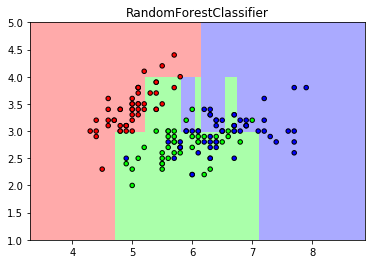

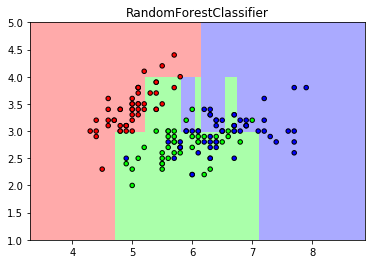

RandomForestClassifier: 0.9266666666666666


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import  RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
RF=RandomForestClassifier(n_estimators=100,n_jobs=4,oob_score=True)#建树的个数/应用处理器个数/随机森林交叉验证
iris=load_iris()
#print(iris)
x=iris.data[:,:2]#取前两维
#print(x)
y=iris.target#标签
#print(y)
RF.fit(x,y)

h=.02 #学习率

#create color maps
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])

for weights in ['uniform','distance']:
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,1].min()-1,x[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max))
    #print(xx)
    Z=RF.predict(np.c_[xx.ravel(),yy.ravel()])#预测
    
    #结果上色
    Z=Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    #训练点绘图
    plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap_bold,
               edgecolor='k',s=20)
    plt.xlim(xx.min(),xx.max())
    plt.title("RandomForestClassifier")
    
plt.show()
print('RandomForestClassifier:',RF.score(x,y))
    
    